# Inteligencja Obliczeniowa w Analizie danych cyfrowych

## Lab 2. Strips Problem - Rozwiązywanie problemów stanowycg i heurystyka

### Miłosz Góralczyk

Jak ostatnio, umieściłem część raportu nad częścią kodu, w celu lepszego dostępu dla sprawdzającego. 

Aby wygenerować ponownie dane, również te wykorzystane w Raporcie, należy najpierw uruchomić komórki częśći II. Kod źródłowy laboratorium

## I. Raport z laboratorium

Problematya którą obrałem to Cargo-Airport Problem

Mając dostępne X samolotów, należy przetransportować Y ładunków tak, aby każdy ładunek Y[i] dotarł na lotnisko Lk[i] z lotniska Lp[i]

Lk, Lp - lotnisko  końcowe i początkowe, zawierające się w zbiorze lotnisk L


Problem STRIPS ma do wyboru akcje:

- załadować ładunek C do samolotu X:
  - samolot X jest na lotnisku A
  - ładunek C jest na lotnisku A
- wyładować ładunek C na lotnisko A:
  - samolot X jest na lotnisku A
  - ładunek C jest w samolocie X
- przelecieć samolotem X z lotniska A na lotnisko B:
  - samolot X jest na lotnisku A


Utworzone przeze mnie trzy problemy:

- Default: Średnia ilość samolotów, Cargo, Lotnisk
- Wide: Wyższa liczba lotnisk do wyboru
- High: Wyższa liczba ładunków do przetransportowania

W pierwszym zadaniu, podstawowym, mają one postać:

1. 3 lotniska, 2 samoloty, 4 cargo
2. 4 lotniska, 1 samolot, 5 cargo
3. 2 lotniska, 1 samolot, 8 cargo

Deklaracja problemu wymaga zadeklarowania:
- Listy Ładunków
- Listy samolotów
- Listy Lotnisk
- Zabronionych lotnisk dla ładunków/samolotów (może być puste)
- stan początkowy:
  - gdzie są ładunki
  - gdzie są samoloty
  - czy ładunek jest już w samolocie
- stan końcowy
  - gdzie ładunki mają dotrzeć
  - gdzie mają się znajdować samoloty (opcj.)

In [63]:
# Dane przestawiają się następująco:

data1

,problem,used_heuristic,elapsed_time
0,Problem 1,False,21.148120
1,Problem 1,True,10.495099
2,Problem 2,False,55.593338
3,Problem 2,True,51.519983
4,Problem 3,False,92.005037
5,Problem 3,True,89.728466


Użyta heurystyka ma najprostszą postać, maksymalizuje liczbę cargo na właściwych lotniskach, nagradzając systematyczne rozwiązywanie problemu w czasie. 

Priorytet mają rozwiącania płynnie rozładowywujące ładunki na odpowiednie lotniska, zamiast zbierając wszystko do samolotów by rozładować wszystko w ostatnich krokach

Jak widać z wyników, Obranie heurystyki wpływa na liczbę sprawdzanych ścieżek, bezpośrednio zmniejszając czas znalezienia rozwiązania

Poprawa jest bardziej widoczna na szybkich problemach, zanikając wraz ze stopniem skomplikowania sytuacji


Jednocześnie, bawiąc się z liczbami samolotów czy lotnisk, zauważyłem, że mała zmiana, nawet dodanie jednego dodatkowego ładunku, czyniło problem 'nierozwiązywalnym' 

tzn. program nie znajdywał rozwiązania przez nawet 120 minut, co oznaczało najwyraźniej ponad stukrotne skomplikowanie sytuacji i liczebności ścieżek 

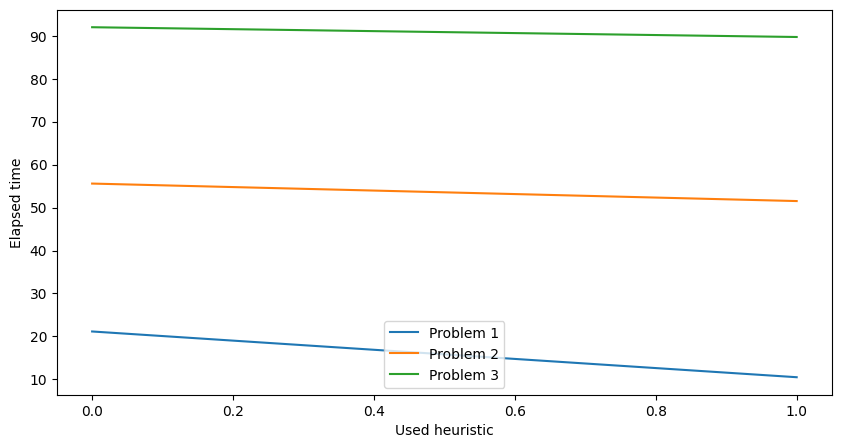

In [64]:

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

for problem in data1['problem'].unique():
    plt.plot(data1[data1['problem'] == problem]['used_heuristic'], data1[data1['problem'] == problem]['elapsed_time'], label=problem)

plt.xlabel('Used heuristic')
plt.ylabel('Elapsed time')

plt.legend()


Jak widać, czas maleje w każdym z Problemów

### Wprowadzenie podcelów

Każdy z problemów został odrobinę zmodyfikowany, aby można było wprowadzić podcele:

Tu podcele mają postać - każdy z samolotów, lub ładunków, posiada listę lotnisk do których nie ma dostępu - tj. nie może się na nich znaleźć.

Przykładowo:

In [ ]:
# cargo_forbidden_airports={'A': {'WRO'}, 'B': set(), 'C': set(), 'D': set(), 'E': {'WRO'}},
# planes_forbidden_airports={'X': {'KRK'}, 'Y':{'WRO'}},

ładunek A i E nie mogą się znaleźć na lotnisku we Wrocławiu, a samoloty X i Y nie mogą lądować na lotniskach w Krakowie i Wrocławiu kolejno.

Czyni to listę dodatkowych celów, których musi się trzymać solver przy próbie rozwiązania danego problemu.

Dane dla rozszerzonych problemów prezentują się następująco:

In [65]:
data2

,problem,used_heuristic,elapsed_time
0,Problem 1,False,19.183656
1,Problem 1,True,15.173520
2,Problem 2,False,20.463680
3,Problem 2,True,19.385069
4,Problem 3,False,51.399539
5,Problem 3,True,42.998832


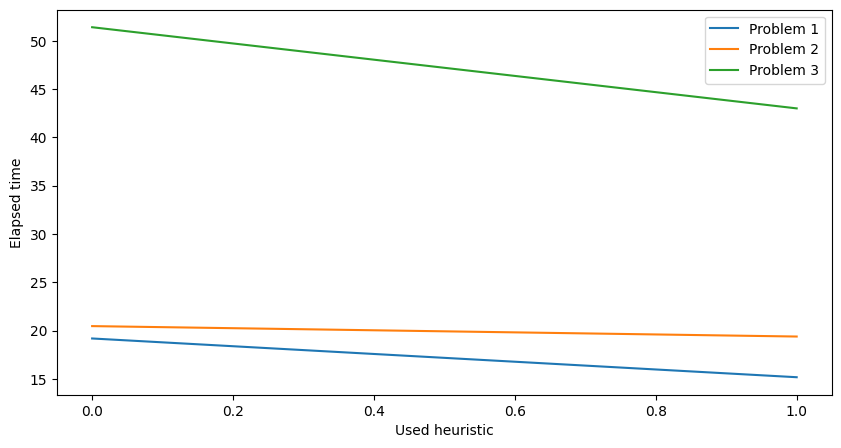

In [66]:

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

for problem in data2['problem'].unique():
    plt.plot(data2[data2['problem'] == problem]['used_heuristic'], data2[data2['problem'] == problem]['elapsed_time'], label=problem)

plt.xlabel('Used heuristic')
plt.ylabel('Elapsed time')

plt.legend()


Różnice czasowe zdecydowanie różnią się w zależności od problemu. W przypadku drugiego problemu, różnice są niewielkie, natomiast w przypadku trzeciego problemu, różnice są znacznie większe.

W ostatnim kroku wszystkie problemy zostały zmodyfikowane tak, aby już spełniać trzeci i ostatnie założenie laboratorium,

tj. Każde rozwiązanie składa się z co najmniej 20 ruchów - load, unload, albo fly

In [67]:
data3

,problem,used_heuristic,elapsed_time
0,Problem 1,False,19.081488
1,Problem 1,True,15.305405
2,Problem 2,False,20.995830
3,Problem 2,True,21.268538
4,Problem 3,False,56.389118
5,Problem 3,True,44.065200


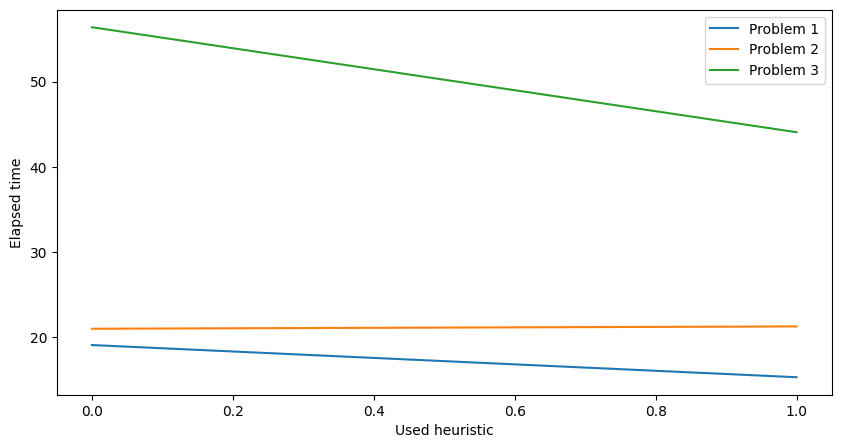

In [68]:

plt.figure(figsize=(10, 5))

for problem in data3['problem'].unique():
    plt.plot(data3[data3['problem'] == problem]['used_heuristic'], data3[data3['problem'] == problem]['elapsed_time'], label=problem)

plt.xlabel('Used heuristic')
plt.ylabel('Elapsed time')

plt.legend()

Tu, z jakiegoś powodu, w problemie drugim zastosowanie heurystyki zwiększyło, a nie zredukowało czas działania.

Warto dodać, że to tutaj zaobserwowałem problemy ze zmianą o jeden stopień, 

sprawiającą że problem rozwiązywany w 20 sekund nagle nie mógł znaleźćrozwiązania przez ponad godzinę, co było dość frustrujące.

### Wnioski

1. Problem stanowy

  STRIPSsolver pozwala na przeszukanie w drzewa decyzyjnego w celu odnalezienia rozwiązania tam, gdzie stan każdego z elementów problemu można opisać zmiennymi Prawda Fałsz

  mogą opisywać położenie, pozycję, oraz stosunek względem innych obiektów, czy to klocki na stole tworzące wieżę, ładunki na lotnisku, lub studenci szukający optymalnego planu zajęć.

  Podając dane problemu, stan początkowy oraz oczekiwany stan końcowy, można uruchomić solver w celu znalezienia rozwiązania.

2. Heurestyka

Określenie funkcji celu, defuniującej, które zachowania należy nagradzać, zazwyczaj pozytywnie wpływa na czas obliczeń problemu,

a także pozwala na preferowanie odpowiednich rozwiązań nad inne. Dla problemu dostawy dóbr tirami, mogłaby to być minimalizacja przebytej drogi, aby zminimalizować koszty paliwa

Można maksymalizować zyski, albo po prostu nagradzać stabilne rozwiązanie które płynnie realizuje swoje cele.

Liczba ścieżek przeszukanych przy użyciu heurystyki była mniejsza niż bez niej.

3. Podcele

Dodanie podceli może określić, podonie jak heurystyka, dokładniejsze działanie solvera.

Różnica polega na tym, że podcele WYMAGAJĄ, nie preferują, odpowiedniego podejścia do problemu, tak, by każdy z podceli został zrealizowany dokładnie tak samo jak cel główny

Dodatkowo, mimo wprowadzenia własnych ograniczeń i możliwości komplikacji rozwiązania, ograniczenia nałożone na stopnie swobody elementów problemu,

podcele redukują możliwości wyboru, przez to zmniejszająć gęstość gałęzi drzewa decyzyjnego.

Zazwyczaj rozwiązanie w takim przypadku będzie dłuższe, ale bardziekj prostoliniowe.

4. Złoźoność i czas obliczeń

czas obliczeń może wzrosnąć dramatycznie nawet przy minimalnej modyfikacji problemu.

Wraz ze złożonością rozwiązania, czas rośnie.

Zwiększenie ilości kroków o 1, zwiększa wysokość całego drzewa decyzyjnego o 1, czyli w prostej matematyce, mając na każdym kroku N samolotów, każdy z nich do wyboru mając M ładunków i L lotnisk,

Koszt rozwiązania wzrośnie o złożoność N*(M + L).

Dllatego heurystyka i podcele są ważne do określenia, aby zredukowaćchoć ułamek z gałęzi tego drzewa

## II. Kod źródłowy laboratorium, pozyskanie danych

### Setup problemu, dataframów, heurystyki

In [49]:

from os.path import exists
from pathlib import Path
from typing import Final
from zipfile import ZipFile
import sys
from wget import download
import pandas as pd


URL: Final[str] = 'https://artint.info/AIPython/aipython.zip'
DESTINATION: Final[Path] = Path('aipython.zip')

if not exists(DESTINATION):
    download(url=URL, out=DESTINATION.absolute().as_posix())

if not exists(DESTINATION.stem):
    with ZipFile(DESTINATION, 'r') as zip_ref:
        zip_ref.extractall(DESTINATION.stem)

data1 = pd.DataFrame(
    columns=['problem', 'used_heuristic', 'elapsed_time']
)

In [50]:
sys.path.append(DESTINATION.stem)
from stripsProblem import Strips, STRIPS_domain, Planning_problem
from time import perf_counter

from searchMPP import SearcherMPP
from stripsForwardPlanner import Forward_STRIPS

In [51]:
def In(obj):
    return obj + '_is_in'

def At(obj):
    return obj + '_is_at'

def Cargo(obj):
    return obj + '_is_cargo'

def Plane(obj):
    return obj + '_is_plane'

def Airport(obj):
    return obj + '_is_airport'

def Load(cargo, plane, airport):
    return 'load_' + cargo + '_from_' + airport + '_to_' + plane

def Unload(cargo, plane, airport):
    return 'unload_' + cargo + '_from_' + plane + '_to_' + airport

def Fly(plane, airport_from, airport_to):
    return 'fly_' + plane + '_from_' + airport_from + '_to_' + airport_to


null: set[str] = {'null'}
def create_air_cargo_transportation(cargo, planes, airports, cargo_forbidden_airports, planes_forbidden_airports) -> STRIPS_domain:
    assert len(cargo) > 0, "Cargo set must not be empty."
    assert len(planes) > 0, "Planes set must not be empty."
    assert len(airports) > 0, "Airports set must not be empty."
    
    assert all(c in cargo_forbidden_airports for c in cargo), "All cargo must have a forbidden airports set that may or may not be empty."
    assert all(p in planes_forbidden_airports for p in planes), "All planes must have a forbidden airports set that may or may not be empty."
    
    feature_domain_dict: dict[str, set[str]] = {In(x): planes | null
                                                for x in cargo}
    feature_domain_dict.update({At(x): (airports - (cargo_forbidden_airports | planes_forbidden_airports)[x]) | null
                                for x in planes | cargo})


    state_map: set[Strips] = {Strips(Load(c, p, a), {At(c): a, At(p): a}, {In(c): p, At(c): 'null'})
                              for c in cargo
                              for p in planes
                              for a in airports}

    state_map.update({Strips(Unload(c, p, a), {In(c): p, At(p): a}, {At(c): a, In(c): 'null'})
                      for c in cargo
                      for p in planes
                      for a in airports
                      if a not in cargo_forbidden_airports[c]})

    state_map.update({Strips(Fly(p, a_from, a_to), {At(p): a_from}, {At(p): a_to})
                      for p in planes
                      for a_from in airports
                      for a_to in airports
                      if a_from != a_to and a_to not in planes_forbidden_airports[p]})

    return STRIPS_domain(feature_domain_dict, state_map)

In [52]:
def h_unloaded_cargo(assignment, goal):
    return sum(1 for k, v in goal.items() if assignment[k] != v and '_is_in' in k)

### Część 1. Brak podcelów, proste prolemy

Zdefiniowane podstawowe problemy:
- 1. Balanced Problem: 3 lotniska, 2 samoloty, 4 cargo
- 2. Wide Problem: 4 lotniska, 1 samolot, 5 cargo
- 3. High Problem: 2 lotniska, 1 samolot, 8 cargo

### PROBLEM 1 - 3 lotniska, 2 samoloty, 4 cargo

In [53]:
# Domain
air_cargo1dom: STRIPS_domain = create_air_cargo_transportation(
    cargo={'A', 'B', 'C', 'D'},
    planes={'X','Y'},
    airports={'KRK', 'WAR', 'WRO'},
    cargo_forbidden_airports={'A': set(), 'B': set(), 'C': set(), 'D': set()},
    planes_forbidden_airports={'X': set(), 'Y': set(),},
)

# Initial state
air_setup1: dict[str, str] = {
    At('A'): 'KRK',
    At('B'): 'WAR',
    At('C'): 'WRO',
    At('D'): 'KRK',

    
    At('X'): 'WRO',
    At('Y'): 'WAR',
    
    # Airplanes start empty
    In('A'): 'null',
    In('B'): 'null',
    In('C'): 'null',
    In('D'): 'null',
}

# Goal state
air_goal1: dict[str, str] = {
    At('A'): 'WAR',
    At('B'): 'WRO',
    At('C'): 'KRK',
    At('D'): 'WAR',

    In('A'): 'null',
    In('B'): 'null',
    In('C'): 'null',
    In('D'): 'null',
}

air_cargo1: Planning_problem = Planning_problem(air_cargo1dom, air_setup1, air_goal1)

In [54]:
print('Problem 1 - No heuristic:')

start: float = perf_counter()
SearcherMPP(Forward_STRIPS(air_cargo1)).search()
end: float = perf_counter()

print(f'Elapsed time: {end - start:.6f} seconds')

data1.loc[len(data1)] = ['Problem 1', False, end - start]

Problem 1 - No heuristic:
Solution: {'A_is_at': 'KRK', 'B_is_at': 'WAR', 'C_is_at': 'WRO', 'D_is_at': 'KRK', 'X_is_at': 'WRO', 'Y_is_at': 'WAR', 'A_is_in': 'null', 'B_is_in': 'null', 'C_is_in': 'null', 'D_is_in': 'null'}
   --load_B_from_WAR_to_Y--> {'A_is_at': 'KRK', 'B_is_at': 'null', 'C_is_at': 'WRO', 'D_is_at': 'KRK', 'X_is_at': 'WRO', 'Y_is_at': 'WAR', 'A_is_in': 'null', 'B_is_in': 'Y', 'C_is_in': 'null', 'D_is_in': 'null'}
   --fly_Y_from_WAR_to_WRO--> {'A_is_at': 'KRK', 'B_is_at': 'null', 'C_is_at': 'WRO', 'D_is_at': 'KRK', 'X_is_at': 'WRO', 'Y_is_at': 'WRO', 'A_is_in': 'null', 'B_is_in': 'Y', 'C_is_in': 'null', 'D_is_in': 'null'}
   --load_C_from_WRO_to_Y--> {'A_is_at': 'KRK', 'B_is_at': 'null', 'C_is_at': 'null', 'D_is_at': 'KRK', 'X_is_at': 'WRO', 'Y_is_at': 'WRO', 'A_is_in': 'null', 'B_is_in': 'Y', 'C_is_in': 'Y', 'D_is_in': 'null'}
   --unload_B_from_Y_to_WRO--> {'A_is_at': 'KRK', 'B_is_at': 'WRO', 'C_is_at': 'null', 'D_is_at': 'KRK', 'X_is_at': 'WRO', 'Y_is_at': 'WRO', 'A_

In [55]:
print('Problem 1 - With heuristic:')

start: float = perf_counter()
SearcherMPP(Forward_STRIPS(air_cargo1, h_unloaded_cargo)).search()
end: float = perf_counter()

print(f'Elapsed time: {end - start:.6f} seconds')

data1.loc[len(data1)] = ['Problem 1', True, end - start]

Problem 1 - With heuristic:
Solution: {'A_is_at': 'KRK', 'B_is_at': 'WAR', 'C_is_at': 'WRO', 'D_is_at': 'KRK', 'X_is_at': 'WRO', 'Y_is_at': 'WAR', 'A_is_in': 'null', 'B_is_in': 'null', 'C_is_in': 'null', 'D_is_in': 'null'}
   --load_C_from_WRO_to_X--> {'A_is_at': 'KRK', 'B_is_at': 'WAR', 'C_is_at': 'null', 'D_is_at': 'KRK', 'X_is_at': 'WRO', 'Y_is_at': 'WAR', 'A_is_in': 'null', 'B_is_in': 'null', 'C_is_in': 'X', 'D_is_in': 'null'}
   --fly_X_from_WRO_to_KRK--> {'A_is_at': 'KRK', 'B_is_at': 'WAR', 'C_is_at': 'null', 'D_is_at': 'KRK', 'X_is_at': 'KRK', 'Y_is_at': 'WAR', 'A_is_in': 'null', 'B_is_in': 'null', 'C_is_in': 'X', 'D_is_in': 'null'}
   --load_A_from_KRK_to_X--> {'A_is_at': 'null', 'B_is_at': 'WAR', 'C_is_at': 'null', 'D_is_at': 'KRK', 'X_is_at': 'KRK', 'Y_is_at': 'WAR', 'A_is_in': 'X', 'B_is_in': 'null', 'C_is_in': 'X', 'D_is_in': 'null'}
   --load_D_from_KRK_to_X--> {'A_is_at': 'null', 'B_is_at': 'WAR', 'C_is_at': 'null', 'D_is_at': 'null', 'X_is_at': 'KRK', 'Y_is_at': 'WAR', '

### PROBLEM 2 - 5 cargo, 1 samolot, 4 lotniska

In [56]:
# Domain
air_cargo2dom: STRIPS_domain = create_air_cargo_transportation(
    cargo={'A', 'B', 'C', 'D', 'E'},
    planes={'X'},
    airports={'KRK', 'WAR', 'WRO', 'RAD'},
    cargo_forbidden_airports={'A': set(), 'B': set(), 'C': set(), 'D': set(), 'E': set(),},
    planes_forbidden_airports={'X': set()},
)

# Initial state
air_setup2: dict[str, str] = {
    At('A'): 'KRK',
    At('B'): 'WAR',
    At('C'): 'WRO',
    At('D'): 'RAD',
    At('E'): 'WAR',

    
    At('X'): 'WRO',
    
    # Airplanes start empty
    In('A'): 'null',
    In('B'): 'null',
    In('C'): 'null',
    In('D'): 'null',
    In('E'): 'null',
}

# Goal state
air_goal2: dict[str, str] = {
    At('A'): 'WAR',
    At('B'): 'WRO',
    At('C'): 'KRK',
    At('D'): 'WAR',
    At('E'): 'RAD',

    In('A'): 'null',
    In('B'): 'null',
    In('C'): 'null',
    In('D'): 'null',
    In('E'): 'null',
}

air_cargo2: Planning_problem = Planning_problem(air_cargo2dom, air_setup2, air_goal2)

In [57]:
print('Problem 2 - No heuristic:')

start: float = perf_counter()
SearcherMPP(Forward_STRIPS(air_cargo2)).search()
end: float = perf_counter()

print(f'Elapsed time: {end - start:.6f} seconds')

data1.loc[len(data1)] = ['Problem 2', False, end - start]

Problem 2 - No heuristic:
Solution: {'A_is_at': 'KRK', 'B_is_at': 'WAR', 'C_is_at': 'WRO', 'D_is_at': 'RAD', 'E_is_at': 'WAR', 'X_is_at': 'WRO', 'A_is_in': 'null', 'B_is_in': 'null', 'C_is_in': 'null', 'D_is_in': 'null', 'E_is_in': 'null'}
   --fly_X_from_WRO_to_WAR--> {'A_is_at': 'KRK', 'B_is_at': 'WAR', 'C_is_at': 'WRO', 'D_is_at': 'RAD', 'E_is_at': 'WAR', 'X_is_at': 'WAR', 'A_is_in': 'null', 'B_is_in': 'null', 'C_is_in': 'null', 'D_is_in': 'null', 'E_is_in': 'null'}
   --load_E_from_WAR_to_X--> {'A_is_at': 'KRK', 'B_is_at': 'WAR', 'C_is_at': 'WRO', 'D_is_at': 'RAD', 'E_is_at': 'null', 'X_is_at': 'WAR', 'A_is_in': 'null', 'B_is_in': 'null', 'C_is_in': 'null', 'D_is_in': 'null', 'E_is_in': 'X'}
   --load_B_from_WAR_to_X--> {'A_is_at': 'KRK', 'B_is_at': 'null', 'C_is_at': 'WRO', 'D_is_at': 'RAD', 'E_is_at': 'null', 'X_is_at': 'WAR', 'A_is_in': 'null', 'B_is_in': 'X', 'C_is_in': 'null', 'D_is_in': 'null', 'E_is_in': 'X'}
   --fly_X_from_WAR_to_WRO--> {'A_is_at': 'KRK', 'B_is_at': 'null'

In [58]:
print('Problem 2 - With heuristic:')

start: float = perf_counter()
SearcherMPP(Forward_STRIPS(air_cargo2, h_unloaded_cargo)).search()
end: float = perf_counter()

print(f'Elapsed time: {end - start:.6f} seconds')

data1.loc[len(data1)] = ['Problem 2', True, end - start]

Problem 2 - With heuristic:
Solution: {'A_is_at': 'KRK', 'B_is_at': 'WAR', 'C_is_at': 'WRO', 'D_is_at': 'RAD', 'E_is_at': 'WAR', 'X_is_at': 'WRO', 'A_is_in': 'null', 'B_is_in': 'null', 'C_is_in': 'null', 'D_is_in': 'null', 'E_is_in': 'null'}
   --load_C_from_WRO_to_X--> {'A_is_at': 'KRK', 'B_is_at': 'WAR', 'C_is_at': 'null', 'D_is_at': 'RAD', 'E_is_at': 'WAR', 'X_is_at': 'WRO', 'A_is_in': 'null', 'B_is_in': 'null', 'C_is_in': 'X', 'D_is_in': 'null', 'E_is_in': 'null'}
   --fly_X_from_WRO_to_WAR--> {'A_is_at': 'KRK', 'B_is_at': 'WAR', 'C_is_at': 'null', 'D_is_at': 'RAD', 'E_is_at': 'WAR', 'X_is_at': 'WAR', 'A_is_in': 'null', 'B_is_in': 'null', 'C_is_in': 'X', 'D_is_in': 'null', 'E_is_in': 'null'}
   --load_E_from_WAR_to_X--> {'A_is_at': 'KRK', 'B_is_at': 'WAR', 'C_is_at': 'null', 'D_is_at': 'RAD', 'E_is_at': 'null', 'X_is_at': 'WAR', 'A_is_in': 'null', 'B_is_in': 'null', 'C_is_in': 'X', 'D_is_in': 'null', 'E_is_in': 'X'}
   --load_B_from_WAR_to_X--> {'A_is_at': 'KRK', 'B_is_at': 'null',

### PROBLEM 3 - 8 cargo, 1 samolot, 2 lotniska

In [59]:
# Domain
air_cargo3dom: STRIPS_domain = create_air_cargo_transportation(
    cargo={'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'},
    planes={'X'},
    airports={'KRK', 'WAR'},
    cargo_forbidden_airports={'A': set(), 'B': set(), 'C': set(), 'D': set(), 'E': set(), 'F': set(), 'G': set(), 'H': set()},
    planes_forbidden_airports={'X': set()}
)

# Initial state
air_setup3: dict[str, str] = {
    At('A'): 'KRK',
    At('B'): 'WAR',
    At('C'): 'KRK',
    At('D'): 'WAR',
    At('E'): 'KRK',
    At('F'): 'WAR',
    At('G'): 'KRK',
    At('H'): 'WAR',

    
    At('X'): 'KRK',
    
    # Airplanes start empty
    In('A'): 'null',
    In('B'): 'null',
    In('C'): 'null',
    In('D'): 'null',
    In('E'): 'null',
    In('F'): 'null',
    In('G'): 'null',
    In('H'): 'null',
}

# Goal state
air_goal3: dict[str, str] = {
    At('A'): 'WAR',
    At('B'): 'KRK',
    At('C'): 'WAR',
    At('D'): 'KRK',
    At('E'): 'WAR',
    At('F'): 'KRK',
    At('G'): 'WAR',
    At('H'): 'KRK',

    In('A'): 'null',
    In('B'): 'null',
    In('C'): 'null',
    In('D'): 'null',
    In('E'): 'null',
    In('F'): 'null',
    In('G'): 'null',
    In('H'): 'null'
}

air_cargo3: Planning_problem = Planning_problem(air_cargo3dom, air_setup3, air_goal3)

In [60]:
print('Problem 3 - No heuristic:')

start: float = perf_counter()
SearcherMPP(Forward_STRIPS(air_cargo3)).search()
end: float = perf_counter()

print(f'Elapsed time: {end - start:.6f} seconds')

data1.loc[len(data1)] = ['Problem 3', False, end - start]

Problem 3 - No heuristic:
Solution: {'A_is_at': 'KRK', 'B_is_at': 'WAR', 'C_is_at': 'KRK', 'D_is_at': 'WAR', 'E_is_at': 'KRK', 'F_is_at': 'WAR', 'G_is_at': 'KRK', 'H_is_at': 'WAR', 'X_is_at': 'KRK', 'A_is_in': 'null', 'B_is_in': 'null', 'C_is_in': 'null', 'D_is_in': 'null', 'E_is_in': 'null', 'F_is_in': 'null', 'G_is_in': 'null', 'H_is_in': 'null'}
   --load_C_from_KRK_to_X--> {'A_is_at': 'KRK', 'B_is_at': 'WAR', 'C_is_at': 'null', 'D_is_at': 'WAR', 'E_is_at': 'KRK', 'F_is_at': 'WAR', 'G_is_at': 'KRK', 'H_is_at': 'WAR', 'X_is_at': 'KRK', 'A_is_in': 'null', 'B_is_in': 'null', 'C_is_in': 'X', 'D_is_in': 'null', 'E_is_in': 'null', 'F_is_in': 'null', 'G_is_in': 'null', 'H_is_in': 'null'}
   --load_E_from_KRK_to_X--> {'A_is_at': 'KRK', 'B_is_at': 'WAR', 'C_is_at': 'null', 'D_is_at': 'WAR', 'E_is_at': 'null', 'F_is_at': 'WAR', 'G_is_at': 'KRK', 'H_is_at': 'WAR', 'X_is_at': 'KRK', 'A_is_in': 'null', 'B_is_in': 'null', 'C_is_in': 'X', 'D_is_in': 'null', 'E_is_in': 'X', 'F_is_in': 'null', 'G_is

In [61]:
print('Problem 3 - Heuristic:')

start: float = perf_counter()
SearcherMPP(Forward_STRIPS(air_cargo3, h_unloaded_cargo)).search()
end: float = perf_counter()

print(f'Elapsed time: {end - start:.6f} seconds')

data1.loc[len(data1)] = ['Problem 3', True, end - start]

Problem 3 - Heuristic:
Solution: {'A_is_at': 'KRK', 'B_is_at': 'WAR', 'C_is_at': 'KRK', 'D_is_at': 'WAR', 'E_is_at': 'KRK', 'F_is_at': 'WAR', 'G_is_at': 'KRK', 'H_is_at': 'WAR', 'X_is_at': 'KRK', 'A_is_in': 'null', 'B_is_in': 'null', 'C_is_in': 'null', 'D_is_in': 'null', 'E_is_in': 'null', 'F_is_in': 'null', 'G_is_in': 'null', 'H_is_in': 'null'}
   --load_C_from_KRK_to_X--> {'A_is_at': 'KRK', 'B_is_at': 'WAR', 'C_is_at': 'null', 'D_is_at': 'WAR', 'E_is_at': 'KRK', 'F_is_at': 'WAR', 'G_is_at': 'KRK', 'H_is_at': 'WAR', 'X_is_at': 'KRK', 'A_is_in': 'null', 'B_is_in': 'null', 'C_is_in': 'X', 'D_is_in': 'null', 'E_is_in': 'null', 'F_is_in': 'null', 'G_is_in': 'null', 'H_is_in': 'null'}
   --load_E_from_KRK_to_X--> {'A_is_at': 'KRK', 'B_is_at': 'WAR', 'C_is_at': 'null', 'D_is_at': 'WAR', 'E_is_at': 'null', 'F_is_at': 'WAR', 'G_is_at': 'KRK', 'H_is_at': 'WAR', 'X_is_at': 'KRK', 'A_is_in': 'null', 'B_is_in': 'null', 'C_is_in': 'X', 'D_is_in': 'null', 'E_is_in': 'X', 'F_is_in': 'null', 'G_is_in

In [62]:
data1

,problem,used_heuristic,elapsed_time
0,Problem 1,False,21.148120
1,Problem 1,True,10.495099
2,Problem 2,False,55.593338
3,Problem 2,True,51.519983
4,Problem 3,False,92.005037
5,Problem 3,True,89.728466


### Część 2 - wprowadzenie podcelów do problemów

Do problemów zostały wprowadzone podcele - wprowadzenie 'zabronionych' lotnisk dla niektórych samolotów albo cargo.

Obostrzenia zredukowały liczbę ściażek, co pozwoliło na zwiększenie zakresu problemów w celu wymaganego do wprowadzenia obostrzeń (nie można zabronić samolotowi lądować na lotnisku w problemie z 1 samolotem albo 2 lotniskami),

In [15]:
data2 = pd.DataFrame(
    columns=['problem', 'used_heuristic', 'elapsed_time']
)

In [16]:
# Domain
air_cargo1dom2: STRIPS_domain = create_air_cargo_transportation(
    cargo={'A', 'B', 'C', 'D', 'E'},
    planes={'X','Y'},
    airports={'KRK', 'WAR', 'WRO'},
    cargo_forbidden_airports={'A': {'WRO'}, 'B': set(), 'C': set(), 'D': set(), 'E': {'WRO'}},
    planes_forbidden_airports={'X': {'KRK'}, 'Y':{'WRO'}},
)

# Initial state
air_setup12: dict[str, str] = {
    At('A'): 'KRK',
    At('B'): 'WAR',
    At('C'): 'WRO',
    At('D'): 'KRK',
    At('E'): 'WAR',

    
    At('X'): 'WRO',
    At('Y'): 'WAR',
    
    # Airplanes start empty
    In('A'): 'null',
    In('B'): 'null',
    In('C'): 'null',
    In('D'): 'null',
    In('E'): 'null',
}

# Goal state
air_goal12: dict[str, str] = {
    At('A'): 'WAR',
    At('B'): 'WRO',
    At('C'): 'KRK',
    At('D'): 'WAR',
    At('E'): 'KRK',

    In('A'): 'null',
    In('B'): 'null',
    In('C'): 'null',
    In('D'): 'null',
    In('E'): 'null',
}

air_cargo1_cz2: Planning_problem = Planning_problem(air_cargo1dom2, air_setup12, air_goal12)

In [17]:
# No heuristic

print('Problem 1 - No heuristic:')
start: float = perf_counter()
SearcherMPP(Forward_STRIPS(air_cargo1_cz2)).search()
end: float = perf_counter()

print(f'Elapsed time: {end - start:.6f} seconds')

data2.loc[len(data2)] = ['Problem 1', False, end - start]

Problem 1 - No heuristic:
Solution: {'A_is_at': 'KRK', 'B_is_at': 'WAR', 'C_is_at': 'WRO', 'D_is_at': 'KRK', 'E_is_at': 'WAR', 'X_is_at': 'WRO', 'Y_is_at': 'WAR', 'A_is_in': 'null', 'B_is_in': 'null', 'C_is_in': 'null', 'D_is_in': 'null', 'E_is_in': 'null'}
   --load_C_from_WRO_to_X--> {'A_is_at': 'KRK', 'B_is_at': 'WAR', 'C_is_at': 'null', 'D_is_at': 'KRK', 'E_is_at': 'WAR', 'X_is_at': 'WRO', 'Y_is_at': 'WAR', 'A_is_in': 'null', 'B_is_in': 'null', 'C_is_in': 'X', 'D_is_in': 'null', 'E_is_in': 'null'}
   --fly_X_from_WRO_to_WAR--> {'A_is_at': 'KRK', 'B_is_at': 'WAR', 'C_is_at': 'null', 'D_is_at': 'KRK', 'E_is_at': 'WAR', 'X_is_at': 'WAR', 'Y_is_at': 'WAR', 'A_is_in': 'null', 'B_is_in': 'null', 'C_is_in': 'X', 'D_is_in': 'null', 'E_is_in': 'null'}
   --unload_C_from_X_to_WAR--> {'A_is_at': 'KRK', 'B_is_at': 'WAR', 'C_is_at': 'WAR', 'D_is_at': 'KRK', 'E_is_at': 'WAR', 'X_is_at': 'WAR', 'Y_is_at': 'WAR', 'A_is_in': 'null', 'B_is_in': 'null', 'C_is_in': 'null', 'D_is_in': 'null', 'E_is_in'

In [18]:
# Heuristic

print('Problem 1 - Heuristic:')
start: float = perf_counter()
SearcherMPP(Forward_STRIPS(air_cargo1_cz2, h_unloaded_cargo)).search()
end: float = perf_counter()

print(f'Elapsed time: {end - start:.6f} seconds')

data2.loc[len(data2)] = ['Problem 1', True, end - start]

Problem 1 - Heuristic:
Solution: {'A_is_at': 'KRK', 'B_is_at': 'WAR', 'C_is_at': 'WRO', 'D_is_at': 'KRK', 'E_is_at': 'WAR', 'X_is_at': 'WRO', 'Y_is_at': 'WAR', 'A_is_in': 'null', 'B_is_in': 'null', 'C_is_in': 'null', 'D_is_in': 'null', 'E_is_in': 'null'}
   --load_C_from_WRO_to_X--> {'A_is_at': 'KRK', 'B_is_at': 'WAR', 'C_is_at': 'null', 'D_is_at': 'KRK', 'E_is_at': 'WAR', 'X_is_at': 'WRO', 'Y_is_at': 'WAR', 'A_is_in': 'null', 'B_is_in': 'null', 'C_is_in': 'X', 'D_is_in': 'null', 'E_is_in': 'null'}
   --fly_X_from_WRO_to_WAR--> {'A_is_at': 'KRK', 'B_is_at': 'WAR', 'C_is_at': 'null', 'D_is_at': 'KRK', 'E_is_at': 'WAR', 'X_is_at': 'WAR', 'Y_is_at': 'WAR', 'A_is_in': 'null', 'B_is_in': 'null', 'C_is_in': 'X', 'D_is_in': 'null', 'E_is_in': 'null'}
   --unload_C_from_X_to_WAR--> {'A_is_at': 'KRK', 'B_is_at': 'WAR', 'C_is_at': 'WAR', 'D_is_at': 'KRK', 'E_is_at': 'WAR', 'X_is_at': 'WAR', 'Y_is_at': 'WAR', 'A_is_in': 'null', 'B_is_in': 'null', 'C_is_in': 'null', 'D_is_in': 'null', 'E_is_in': '

In [19]:
# Domain
air_cargo2dom_cz2: STRIPS_domain = create_air_cargo_transportation(
    cargo={'A', 'B', 'C', 'D', 'E'},
    planes={'X'},
    airports={'KRK', 'WAR', 'WRO', 'RAD'},
    cargo_forbidden_airports={'A': {'RAD'}, 'B': {'KRK'}, 'C': set(), 'D': set(), 'E': set(),},
    planes_forbidden_airports={'X': set()},
)

# Initial state
air_setup2_cz2: dict[str, str] = {
    At('A'): 'KRK',
    At('B'): 'WAR',
    At('C'): 'WRO',
    At('D'): 'RAD',
    At('E'): 'WAR',

    
    At('X'): 'WRO',
    
    # Airplanes start empty
    In('A'): 'null',
    In('B'): 'null',
    In('C'): 'null',
    In('D'): 'null',
    In('E'): 'null',
}

# Goal state
air_goal2_cz2: dict[str, str] = {
    At('A'): 'WAR',
    At('B'): 'WRO',
    At('C'): 'KRK',
    At('D'): 'WAR',
    At('E'): 'RAD',

    In('A'): 'null',
    In('B'): 'null',
    In('C'): 'null',
    In('D'): 'null',
    In('E'): 'null',
}

air_cargo2_cz2: Planning_problem = Planning_problem(air_cargo2dom_cz2, air_setup2_cz2, air_goal2_cz2)

In [20]:
# No heuristic

print('Problem 2 - No heuristic:')
start: float = perf_counter()
SearcherMPP(Forward_STRIPS(air_cargo2_cz2)).search()
end: float = perf_counter()

print(f'Elapsed time: {end - start:.6f} seconds')

data2.loc[len(data2)] = ['Problem 2', False, end - start]

Problem 2 - No heuristic:
Solution: {'A_is_at': 'KRK', 'B_is_at': 'WAR', 'C_is_at': 'WRO', 'D_is_at': 'RAD', 'E_is_at': 'WAR', 'X_is_at': 'WRO', 'A_is_in': 'null', 'B_is_in': 'null', 'C_is_in': 'null', 'D_is_in': 'null', 'E_is_in': 'null'}
   --fly_X_from_WRO_to_WAR--> {'A_is_at': 'KRK', 'B_is_at': 'WAR', 'C_is_at': 'WRO', 'D_is_at': 'RAD', 'E_is_at': 'WAR', 'X_is_at': 'WAR', 'A_is_in': 'null', 'B_is_in': 'null', 'C_is_in': 'null', 'D_is_in': 'null', 'E_is_in': 'null'}
   --load_E_from_WAR_to_X--> {'A_is_at': 'KRK', 'B_is_at': 'WAR', 'C_is_at': 'WRO', 'D_is_at': 'RAD', 'E_is_at': 'null', 'X_is_at': 'WAR', 'A_is_in': 'null', 'B_is_in': 'null', 'C_is_in': 'null', 'D_is_in': 'null', 'E_is_in': 'X'}
   --load_B_from_WAR_to_X--> {'A_is_at': 'KRK', 'B_is_at': 'null', 'C_is_at': 'WRO', 'D_is_at': 'RAD', 'E_is_at': 'null', 'X_is_at': 'WAR', 'A_is_in': 'null', 'B_is_in': 'X', 'C_is_in': 'null', 'D_is_in': 'null', 'E_is_in': 'X'}
   --fly_X_from_WAR_to_RAD--> {'A_is_at': 'KRK', 'B_is_at': 'null'

In [21]:
# Heuristic

print('Problem 2 - Heuristic:')

start: float = perf_counter()
SearcherMPP(Forward_STRIPS(air_cargo2_cz2, h_unloaded_cargo)).search()
end: float = perf_counter()

print(f'Elapsed time: {end - start:.6f} seconds')

data2.loc[len(data2)] = ['Problem 2', True, end - start]

Problem 2 - Heuristic:
Solution: {'A_is_at': 'KRK', 'B_is_at': 'WAR', 'C_is_at': 'WRO', 'D_is_at': 'RAD', 'E_is_at': 'WAR', 'X_is_at': 'WRO', 'A_is_in': 'null', 'B_is_in': 'null', 'C_is_in': 'null', 'D_is_in': 'null', 'E_is_in': 'null'}
   --load_C_from_WRO_to_X--> {'A_is_at': 'KRK', 'B_is_at': 'WAR', 'C_is_at': 'null', 'D_is_at': 'RAD', 'E_is_at': 'WAR', 'X_is_at': 'WRO', 'A_is_in': 'null', 'B_is_in': 'null', 'C_is_in': 'X', 'D_is_in': 'null', 'E_is_in': 'null'}
   --fly_X_from_WRO_to_WAR--> {'A_is_at': 'KRK', 'B_is_at': 'WAR', 'C_is_at': 'null', 'D_is_at': 'RAD', 'E_is_at': 'WAR', 'X_is_at': 'WAR', 'A_is_in': 'null', 'B_is_in': 'null', 'C_is_in': 'X', 'D_is_in': 'null', 'E_is_in': 'null'}
   --load_E_from_WAR_to_X--> {'A_is_at': 'KRK', 'B_is_at': 'WAR', 'C_is_at': 'null', 'D_is_at': 'RAD', 'E_is_at': 'null', 'X_is_at': 'WAR', 'A_is_in': 'null', 'B_is_in': 'null', 'C_is_in': 'X', 'D_is_in': 'null', 'E_is_in': 'X'}
   --load_B_from_WAR_to_X--> {'A_is_at': 'KRK', 'B_is_at': 'null', 'C_i

In [22]:
# Domain
air_cargo3dom_cz2: STRIPS_domain = create_air_cargo_transportation(
    cargo={'A', 'B', 'C', 'D', 'E'},
    planes={'X', 'Y'},
    airports={'KRK', 'WAR', 'GDA'},
    cargo_forbidden_airports={'A': set(), 'B': set(), 'C': set(), 'D': set(), 'E': set()},
    planes_forbidden_airports={'X': {'KRK'}, 'Y': {'WAR'}}
)

# Initial state
air_setup3_cz2: dict[str, str] = {
    At('A'): 'KRK',
    At('B'): 'WAR',
    At('C'): 'GDA',
    At('D'): 'WAR',
    At('E'): 'KRK',

    
    At('X'): 'KRK',
    At('Y'): 'GDA',
    
    # Airplanes start empty
    In('A'): 'null',
    In('B'): 'null',
    In('C'): 'null',
    In('D'): 'null',
    In('E'): 'null',
}

# Goal state
air_goal3_cz2: dict[str, str] = {
    At('A'): 'WAR',
    At('B'): 'GDA',
    At('C'): 'WAR',
    At('D'): 'KRK',
    At('E'): 'WAR',

    In('A'): 'null',
    In('B'): 'null',
    In('C'): 'null',
    In('D'): 'null',
    In('E'): 'null',
}

air_cargo3_cz2: Planning_problem = Planning_problem(air_cargo3dom_cz2, air_setup3_cz2, air_goal3_cz2)

In [23]:
# No heuristic

print('Problem 3 - No heuristic:')
start: float = perf_counter()
SearcherMPP(Forward_STRIPS(air_cargo3_cz2)).search()
end: float = perf_counter()

print(f'Elapsed time: {end - start:.6f} seconds')

data2.loc[len(data2)] = ['Problem 3', False, end - start]

Problem 3 - No heuristic:
Solution: {'A_is_at': 'KRK', 'B_is_at': 'WAR', 'C_is_at': 'GDA', 'D_is_at': 'WAR', 'E_is_at': 'KRK', 'X_is_at': 'KRK', 'Y_is_at': 'GDA', 'A_is_in': 'null', 'B_is_in': 'null', 'C_is_in': 'null', 'D_is_in': 'null', 'E_is_in': 'null'}
   --load_A_from_KRK_to_X--> {'A_is_at': 'null', 'B_is_at': 'WAR', 'C_is_at': 'GDA', 'D_is_at': 'WAR', 'E_is_at': 'KRK', 'X_is_at': 'KRK', 'Y_is_at': 'GDA', 'A_is_in': 'X', 'B_is_in': 'null', 'C_is_in': 'null', 'D_is_in': 'null', 'E_is_in': 'null'}
   --load_E_from_KRK_to_X--> {'A_is_at': 'null', 'B_is_at': 'WAR', 'C_is_at': 'GDA', 'D_is_at': 'WAR', 'E_is_at': 'null', 'X_is_at': 'KRK', 'Y_is_at': 'GDA', 'A_is_in': 'X', 'B_is_in': 'null', 'C_is_in': 'null', 'D_is_in': 'null', 'E_is_in': 'X'}
   --fly_X_from_KRK_to_WAR--> {'A_is_at': 'null', 'B_is_at': 'WAR', 'C_is_at': 'GDA', 'D_is_at': 'WAR', 'E_is_at': 'null', 'X_is_at': 'WAR', 'Y_is_at': 'GDA', 'A_is_in': 'X', 'B_is_in': 'null', 'C_is_in': 'null', 'D_is_in': 'null', 'E_is_in': 'X'

In [24]:
#heuristic

print('Problem 3 - Heuristic:')
start: float = perf_counter()
SearcherMPP(Forward_STRIPS(air_cargo3_cz2, h_unloaded_cargo)).search()
end: float = perf_counter()

print(f'Elapsed time: {end - start:.6f} seconds')

data2.loc[len(data2)] = ['Problem 3', True, end - start]

Problem 3 - Heuristic:
Solution: {'A_is_at': 'KRK', 'B_is_at': 'WAR', 'C_is_at': 'GDA', 'D_is_at': 'WAR', 'E_is_at': 'KRK', 'X_is_at': 'KRK', 'Y_is_at': 'GDA', 'A_is_in': 'null', 'B_is_in': 'null', 'C_is_in': 'null', 'D_is_in': 'null', 'E_is_in': 'null'}
   --load_A_from_KRK_to_X--> {'A_is_at': 'null', 'B_is_at': 'WAR', 'C_is_at': 'GDA', 'D_is_at': 'WAR', 'E_is_at': 'KRK', 'X_is_at': 'KRK', 'Y_is_at': 'GDA', 'A_is_in': 'X', 'B_is_in': 'null', 'C_is_in': 'null', 'D_is_in': 'null', 'E_is_in': 'null'}
   --load_E_from_KRK_to_X--> {'A_is_at': 'null', 'B_is_at': 'WAR', 'C_is_at': 'GDA', 'D_is_at': 'WAR', 'E_is_at': 'null', 'X_is_at': 'KRK', 'Y_is_at': 'GDA', 'A_is_in': 'X', 'B_is_in': 'null', 'C_is_in': 'null', 'D_is_in': 'null', 'E_is_in': 'X'}
   --fly_X_from_KRK_to_GDA--> {'A_is_at': 'null', 'B_is_at': 'WAR', 'C_is_at': 'GDA', 'D_is_at': 'WAR', 'E_is_at': 'null', 'X_is_at': 'GDA', 'Y_is_at': 'GDA', 'A_is_in': 'X', 'B_is_in': 'null', 'C_is_in': 'null', 'D_is_in': 'null', 'E_is_in': 'X'}
 

In [25]:
data2

,problem,used_heuristic,elapsed_time
0,Problem 1,False,19.183656
1,Problem 1,True,15.173520
2,Problem 2,False,20.463680
3,Problem 2,True,19.385069
4,Problem 3,False,51.399539
5,Problem 3,True,42.998832


### Część 3 - rozszerzenie problemów

Rozszerzenie problemów przez zwiększenie ilości Cargo w problemach przy utrzymaniu podcelów

In [26]:
data3 = pd.DataFrame(
    columns=['problem', 'used_heuristic', 'elapsed_time']
)

In [27]:
# Domain
air_cargo1dom_cz3: STRIPS_domain = create_air_cargo_transportation(
    cargo={'A', 'B', 'C', 'D', 'E'},
    planes={'X','Y'},
    airports={'KRK', 'WAR', 'WRO'},
    cargo_forbidden_airports={'A': {'WRO'}, 'B': set(), 'C': set(), 'D': set(), 'E': {'WRO'}},
    planes_forbidden_airports={'X': {'KRK'}, 'Y':{'WRO'}},
)

# Initial state
air_setup1_cz3: dict[str, str] = {
    At('A'): 'KRK',
    At('B'): 'WAR',
    At('C'): 'WRO',
    At('D'): 'KRK',
    At('E'): 'WAR',

    
    At('X'): 'WRO',
    At('Y'): 'WAR',
    
    # Airplanes start empty
    In('A'): 'null',
    In('B'): 'null',
    In('C'): 'null',
    In('D'): 'null',
    In('E'): 'null',
    In('F'): 'null',
}

# Goal state
air_goal1_cz3: dict[str, str] = {
    At('A'): 'WAR',
    At('B'): 'WRO',
    At('C'): 'KRK',
    At('D'): 'WAR',
    At('E'): 'KRK',


    In('A'): 'null',
    In('B'): 'null',
    In('C'): 'null',
    In('D'): 'null',
    In('E'): 'null',
}

air_cargo1_cz3: Planning_problem = Planning_problem(air_cargo1dom_cz3, air_setup1_cz3, air_goal1_cz3)

In [28]:
# No heuristic

print('Problem 1 - No heuristic:')
start: float = perf_counter()
SearcherMPP(Forward_STRIPS(air_cargo1_cz3)).search()
end: float = perf_counter()

print(f'Elapsed time: {end - start:.6f} seconds')

data3.loc[len(data3)] = ['Problem 1', False, end - start]

Problem 1 - No heuristic:
Solution: {'A_is_at': 'KRK', 'B_is_at': 'WAR', 'C_is_at': 'WRO', 'D_is_at': 'KRK', 'E_is_at': 'WAR', 'X_is_at': 'WRO', 'Y_is_at': 'WAR', 'A_is_in': 'null', 'B_is_in': 'null', 'C_is_in': 'null', 'D_is_in': 'null', 'E_is_in': 'null', 'F_is_in': 'null'}
   --load_C_from_WRO_to_X--> {'A_is_at': 'KRK', 'B_is_at': 'WAR', 'C_is_at': 'null', 'D_is_at': 'KRK', 'E_is_at': 'WAR', 'X_is_at': 'WRO', 'Y_is_at': 'WAR', 'A_is_in': 'null', 'B_is_in': 'null', 'C_is_in': 'X', 'D_is_in': 'null', 'E_is_in': 'null', 'F_is_in': 'null'}
   --fly_X_from_WRO_to_WAR--> {'A_is_at': 'KRK', 'B_is_at': 'WAR', 'C_is_at': 'null', 'D_is_at': 'KRK', 'E_is_at': 'WAR', 'X_is_at': 'WAR', 'Y_is_at': 'WAR', 'A_is_in': 'null', 'B_is_in': 'null', 'C_is_in': 'X', 'D_is_in': 'null', 'E_is_in': 'null', 'F_is_in': 'null'}
   --unload_C_from_X_to_WAR--> {'A_is_at': 'KRK', 'B_is_at': 'WAR', 'C_is_at': 'WAR', 'D_is_at': 'KRK', 'E_is_at': 'WAR', 'X_is_at': 'WAR', 'Y_is_at': 'WAR', 'A_is_in': 'null', 'B_is_in'

In [29]:
#heuristic

print('Problem 1 - Heuristic:')
start: float = perf_counter()
SearcherMPP(Forward_STRIPS(air_cargo1_cz3, h_unloaded_cargo)).search()
end: float = perf_counter()

print(f'Elapsed time: {end - start:.6f} seconds')

data3.loc[len(data3)] = ['Problem 1', True, end - start]

Problem 1 - Heuristic:
Solution: {'A_is_at': 'KRK', 'B_is_at': 'WAR', 'C_is_at': 'WRO', 'D_is_at': 'KRK', 'E_is_at': 'WAR', 'X_is_at': 'WRO', 'Y_is_at': 'WAR', 'A_is_in': 'null', 'B_is_in': 'null', 'C_is_in': 'null', 'D_is_in': 'null', 'E_is_in': 'null', 'F_is_in': 'null'}
   --load_C_from_WRO_to_X--> {'A_is_at': 'KRK', 'B_is_at': 'WAR', 'C_is_at': 'null', 'D_is_at': 'KRK', 'E_is_at': 'WAR', 'X_is_at': 'WRO', 'Y_is_at': 'WAR', 'A_is_in': 'null', 'B_is_in': 'null', 'C_is_in': 'X', 'D_is_in': 'null', 'E_is_in': 'null', 'F_is_in': 'null'}
   --fly_X_from_WRO_to_WAR--> {'A_is_at': 'KRK', 'B_is_at': 'WAR', 'C_is_at': 'null', 'D_is_at': 'KRK', 'E_is_at': 'WAR', 'X_is_at': 'WAR', 'Y_is_at': 'WAR', 'A_is_in': 'null', 'B_is_in': 'null', 'C_is_in': 'X', 'D_is_in': 'null', 'E_is_in': 'null', 'F_is_in': 'null'}
   --unload_C_from_X_to_WAR--> {'A_is_at': 'KRK', 'B_is_at': 'WAR', 'C_is_at': 'WAR', 'D_is_at': 'KRK', 'E_is_at': 'WAR', 'X_is_at': 'WAR', 'Y_is_at': 'WAR', 'A_is_in': 'null', 'B_is_in': '

In [30]:
# Domain
air_cargo2dom_cz3: STRIPS_domain = create_air_cargo_transportation(
    cargo={'A', 'B', 'C', 'D', 'E'},
    planes={'X'},
    airports={'KRK', 'WAR', 'WRO', 'RAD'},
    cargo_forbidden_airports={'A': {'RAD'}, 'B': {'KRK'}, 'C': set(), 'D': set(), 'E': set(),},
    planes_forbidden_airports={'X': set()},
)

# Initial state
air_setup2_cz3: dict[str, str] = {
    At('A'): 'KRK',
    At('B'): 'WAR',
    At('C'): 'WRO',
    At('D'): 'RAD',
    At('E'): 'WAR',

    
    At('X'): 'WRO',
    
    # Airplanes start empty
    In('A'): 'null',
    In('B'): 'null',
    In('C'): 'null',
    In('D'): 'null',
    In('E'): 'null',
}

# Goal state
air_goal2_cz3: dict[str, str] = {
    At('A'): 'WAR',
    At('B'): 'WRO',
    At('C'): 'KRK',
    At('D'): 'WAR',
    At('E'): 'RAD',

    In('A'): 'null',
    In('B'): 'null',
    In('C'): 'null',
    In('D'): 'null',
    In('E'): 'null',
}

air_cargo2_cz3: Planning_problem = Planning_problem(air_cargo2dom_cz3, air_setup2_cz3, air_goal2_cz3)

In [31]:
# No heuristic

print('Problem 2 - No heuristic:')
start: float = perf_counter()
SearcherMPP(Forward_STRIPS(air_cargo2_cz3)).search()
end: float = perf_counter()

print(f'Elapsed time: {end - start:.6f} seconds')

data3.loc[len(data3)] = ['Problem 2', False, end - start]

Problem 2 - No heuristic:
Solution: {'A_is_at': 'KRK', 'B_is_at': 'WAR', 'C_is_at': 'WRO', 'D_is_at': 'RAD', 'E_is_at': 'WAR', 'X_is_at': 'WRO', 'A_is_in': 'null', 'B_is_in': 'null', 'C_is_in': 'null', 'D_is_in': 'null', 'E_is_in': 'null'}
   --fly_X_from_WRO_to_WAR--> {'A_is_at': 'KRK', 'B_is_at': 'WAR', 'C_is_at': 'WRO', 'D_is_at': 'RAD', 'E_is_at': 'WAR', 'X_is_at': 'WAR', 'A_is_in': 'null', 'B_is_in': 'null', 'C_is_in': 'null', 'D_is_in': 'null', 'E_is_in': 'null'}
   --load_E_from_WAR_to_X--> {'A_is_at': 'KRK', 'B_is_at': 'WAR', 'C_is_at': 'WRO', 'D_is_at': 'RAD', 'E_is_at': 'null', 'X_is_at': 'WAR', 'A_is_in': 'null', 'B_is_in': 'null', 'C_is_in': 'null', 'D_is_in': 'null', 'E_is_in': 'X'}
   --load_B_from_WAR_to_X--> {'A_is_at': 'KRK', 'B_is_at': 'null', 'C_is_at': 'WRO', 'D_is_at': 'RAD', 'E_is_at': 'null', 'X_is_at': 'WAR', 'A_is_in': 'null', 'B_is_in': 'X', 'C_is_in': 'null', 'D_is_in': 'null', 'E_is_in': 'X'}
   --fly_X_from_WAR_to_WRO--> {'A_is_at': 'KRK', 'B_is_at': 'null'

In [32]:
# No heuristic

print('Problem 1 - Heuristic:')
start: float = perf_counter()
SearcherMPP(Forward_STRIPS(air_cargo2_cz3)).search()
end: float = perf_counter()

print(f'Elapsed time: {end - start:.6f} seconds')

data3.loc[len(data3)] = ['Problem 2', True, end - start]

Problem 1 - Heuristic:
Solution: {'A_is_at': 'KRK', 'B_is_at': 'WAR', 'C_is_at': 'WRO', 'D_is_at': 'RAD', 'E_is_at': 'WAR', 'X_is_at': 'WRO', 'A_is_in': 'null', 'B_is_in': 'null', 'C_is_in': 'null', 'D_is_in': 'null', 'E_is_in': 'null'}
   --fly_X_from_WRO_to_WAR--> {'A_is_at': 'KRK', 'B_is_at': 'WAR', 'C_is_at': 'WRO', 'D_is_at': 'RAD', 'E_is_at': 'WAR', 'X_is_at': 'WAR', 'A_is_in': 'null', 'B_is_in': 'null', 'C_is_in': 'null', 'D_is_in': 'null', 'E_is_in': 'null'}
   --load_E_from_WAR_to_X--> {'A_is_at': 'KRK', 'B_is_at': 'WAR', 'C_is_at': 'WRO', 'D_is_at': 'RAD', 'E_is_at': 'null', 'X_is_at': 'WAR', 'A_is_in': 'null', 'B_is_in': 'null', 'C_is_in': 'null', 'D_is_in': 'null', 'E_is_in': 'X'}
   --load_B_from_WAR_to_X--> {'A_is_at': 'KRK', 'B_is_at': 'null', 'C_is_at': 'WRO', 'D_is_at': 'RAD', 'E_is_at': 'null', 'X_is_at': 'WAR', 'A_is_in': 'null', 'B_is_in': 'X', 'C_is_in': 'null', 'D_is_in': 'null', 'E_is_in': 'X'}
   --fly_X_from_WAR_to_WRO--> {'A_is_at': 'KRK', 'B_is_at': 'null', '

In [33]:
# Domain
air_cargo3dom_cz3: STRIPS_domain = create_air_cargo_transportation(
    cargo={'A', 'B', 'C', 'D', 'E'},
    planes={'X', 'Y'},
    airports={'KRK', 'WAR', 'GDA'},
    cargo_forbidden_airports={'A': set(), 'B': set(), 'C': set(), 'D': set(), 'E': set()},
    planes_forbidden_airports={'X': {'KRK'}, 'Y': {'WAR'}}
)

# Initial state
air_setup3_cz3: dict[str, str] = {
    At('A'): 'KRK',
    At('B'): 'WAR',
    At('C'): 'GDA',
    At('D'): 'WAR',
    At('E'): 'KRK',

    
    At('X'): 'KRK',
    At('Y'): 'GDA',
    
    # Airplanes start empty
    In('A'): 'null',
    In('B'): 'null',
    In('C'): 'null',
    In('D'): 'null',
    In('E'): 'null',
}

# Goal state
air_goal3_cz3: dict[str, str] = {
    At('A'): 'WAR',
    At('B'): 'GDA',
    At('C'): 'WAR',
    At('D'): 'KRK',
    At('E'): 'WAR',

    In('A'): 'null',
    In('B'): 'null',
    In('C'): 'null',
    In('D'): 'null',
    In('E'): 'null',
}

air_cargo3_cz3: Planning_problem = Planning_problem(air_cargo3dom_cz3, air_setup3_cz3, air_goal3_cz3)

In [34]:
# No heuristic

print('Problem 3 - No heuristic:')
start: float = perf_counter()
SearcherMPP(Forward_STRIPS(air_cargo3_cz3)).search()
end: float = perf_counter()

print(f'Elapsed time: {end - start:.6f} seconds')

data3.loc[len(data3)] = ['Problem 3', False, end - start]

Problem 3 - No heuristic:
Solution: {'A_is_at': 'KRK', 'B_is_at': 'WAR', 'C_is_at': 'GDA', 'D_is_at': 'WAR', 'E_is_at': 'KRK', 'X_is_at': 'KRK', 'Y_is_at': 'GDA', 'A_is_in': 'null', 'B_is_in': 'null', 'C_is_in': 'null', 'D_is_in': 'null', 'E_is_in': 'null'}
   --load_E_from_KRK_to_X--> {'A_is_at': 'KRK', 'B_is_at': 'WAR', 'C_is_at': 'GDA', 'D_is_at': 'WAR', 'E_is_at': 'null', 'X_is_at': 'KRK', 'Y_is_at': 'GDA', 'A_is_in': 'null', 'B_is_in': 'null', 'C_is_in': 'null', 'D_is_in': 'null', 'E_is_in': 'X'}
   --load_A_from_KRK_to_X--> {'A_is_at': 'null', 'B_is_at': 'WAR', 'C_is_at': 'GDA', 'D_is_at': 'WAR', 'E_is_at': 'null', 'X_is_at': 'KRK', 'Y_is_at': 'GDA', 'A_is_in': 'X', 'B_is_in': 'null', 'C_is_in': 'null', 'D_is_in': 'null', 'E_is_in': 'X'}
   --fly_X_from_KRK_to_WAR--> {'A_is_at': 'null', 'B_is_at': 'WAR', 'C_is_at': 'GDA', 'D_is_at': 'WAR', 'E_is_at': 'null', 'X_is_at': 'WAR', 'Y_is_at': 'GDA', 'A_is_in': 'X', 'B_is_in': 'null', 'C_is_in': 'null', 'D_is_in': 'null', 'E_is_in': 'X'

In [35]:
#heuristic

print('Problem 3 - Heuristic:')

start: float = perf_counter()
SearcherMPP(Forward_STRIPS(air_cargo3_cz3, h_unloaded_cargo)).search()
end: float = perf_counter()

print(f'Elapsed time: {end - start:.6f} seconds')

data3.loc[len(data3)] = ['Problem 3', True, end - start]

Problem 3 - Heuristic:
Solution: {'A_is_at': 'KRK', 'B_is_at': 'WAR', 'C_is_at': 'GDA', 'D_is_at': 'WAR', 'E_is_at': 'KRK', 'X_is_at': 'KRK', 'Y_is_at': 'GDA', 'A_is_in': 'null', 'B_is_in': 'null', 'C_is_in': 'null', 'D_is_in': 'null', 'E_is_in': 'null'}
   --load_E_from_KRK_to_X--> {'A_is_at': 'KRK', 'B_is_at': 'WAR', 'C_is_at': 'GDA', 'D_is_at': 'WAR', 'E_is_at': 'null', 'X_is_at': 'KRK', 'Y_is_at': 'GDA', 'A_is_in': 'null', 'B_is_in': 'null', 'C_is_in': 'null', 'D_is_in': 'null', 'E_is_in': 'X'}
   --load_A_from_KRK_to_X--> {'A_is_at': 'null', 'B_is_at': 'WAR', 'C_is_at': 'GDA', 'D_is_at': 'WAR', 'E_is_at': 'null', 'X_is_at': 'KRK', 'Y_is_at': 'GDA', 'A_is_in': 'X', 'B_is_in': 'null', 'C_is_in': 'null', 'D_is_in': 'null', 'E_is_in': 'X'}
   --fly_X_from_KRK_to_GDA--> {'A_is_at': 'null', 'B_is_at': 'WAR', 'C_is_at': 'GDA', 'D_is_at': 'WAR', 'E_is_at': 'null', 'X_is_at': 'GDA', 'Y_is_at': 'GDA', 'A_is_in': 'X', 'B_is_in': 'null', 'C_is_in': 'null', 'D_is_in': 'null', 'E_is_in': 'X'}
 

In [36]:
data3

,problem,used_heuristic,elapsed_time
0,Problem 1,False,19.081488
1,Problem 1,True,15.305405
2,Problem 2,False,20.995830
3,Problem 2,True,21.268538
4,Problem 3,False,56.389118
5,Problem 3,True,44.065200
